In [1]:
library(GLMsData)
library(statmod)

Warning message:
"package 'statmod' was built under R version 3.6.3"

In [2]:
data(seabirds)

In [3]:
str(seabirds)

'data.frame':	40 obs. of  3 variables:
 $ Species: Factor w/ 4 levels "CA","LA","M",..: 3 3 3 3 3 3 3 3 3 3 ...
 $ Quadrat: int  1 2 3 4 5 6 7 8 9 10 ...
 $ Count  : int  0 0 0 1 1 0 0 1 1 3 ...


In [4]:
seabirds

Species,Quadrat,Count
M,1,0
M,2,0
M,3,0
M,4,1
M,5,1
M,6,0
M,7,0
M,8,1
M,9,1
M,10,3


In [5]:
glm.poisson <- glm(Count ~ Species + factor(Quadrat), data=seabirds)

In [6]:
coef(summary(glm.poisson))

,Estimate,Std. Error,t value,Pr(>|t|)
(Intercept),1.100000e+00,0.6964859,1.579357e+00,0.12589967
SpeciesLA,-5.000000e-01,0.5463685,-9.151333e-01,0.36822280
SpeciesM,-1.000000e+00,0.5463685,-1.830267e+00,0.07827099
SpeciesP,-9.000000e-01,0.5463685,-1.647240e+00,0.11109987
factor(Quadrat)2,1.828559e-16,0.8638844,2.116671e-16,1.00000000
factor(Quadrat)3,-2.500000e-01,0.8638844,-2.893906e-01,0.77449310
factor(Quadrat)4,5.000000e-01,0.8638844,5.787811e-01,0.56753425
factor(Quadrat)5,5.000000e-01,0.8638844,5.787811e-01,0.56753425
factor(Quadrat)6,-2.500000e-01,0.8638844,-2.893906e-01,0.77449310
factor(Quadrat)7,1.750000e+00,0.8638844,2.025734e+00,0.05277921


In [7]:
anova(glm.poisson, test="F")

,Df,Deviance,Resid. Df,Resid. Dev,F,Pr(>F)
NULL,NA,NA,39,71.6,NA,NA
Species,3,6.2,36,65.4,1.384615,0.2687531
factor(Quadrat),9,25.1,27,40.3,1.868486,0.1010720


In [11]:
gof.dev <- deviance(glm.poisson)
phi.meandev <- deviance(glm.poisson) / df.residual(glm.poisson)
phi.meandev
phi.pearson <- sum(glm.poisson$weights*glm.poisson$residuals^2) / df.residual(glm.poisson)
phi.pearson
summary(glm.poisson)$dispersion # Overdispersion???

[1] 1.492593

[1] 1.492593

[1] 1.492593

### Tất cả các quan sát count nhiều quan sát nhỏ hơn <= 3 không đạt điều kiện xấp xỉ yên ngựa nên hàm độ lệch phần dư không tuân theo phân phối chi-square

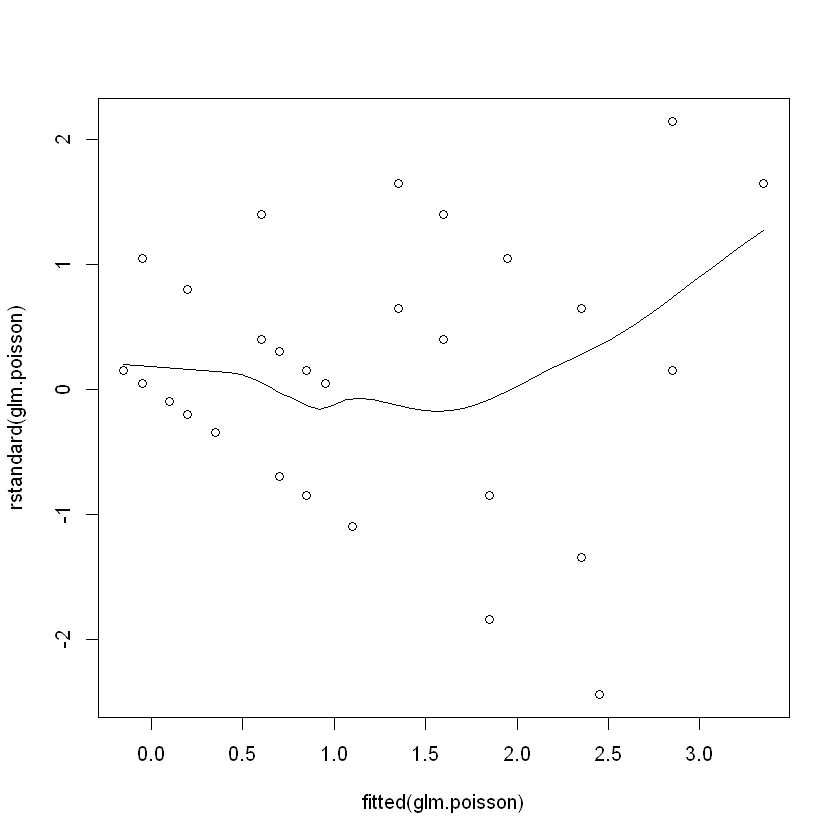

In [15]:
scatter.smooth(rstandard(glm.poisson) ~ fitted(glm.poisson))

Warning message in sqrt(fitted(glm.poisson)):
"NaNs produced"

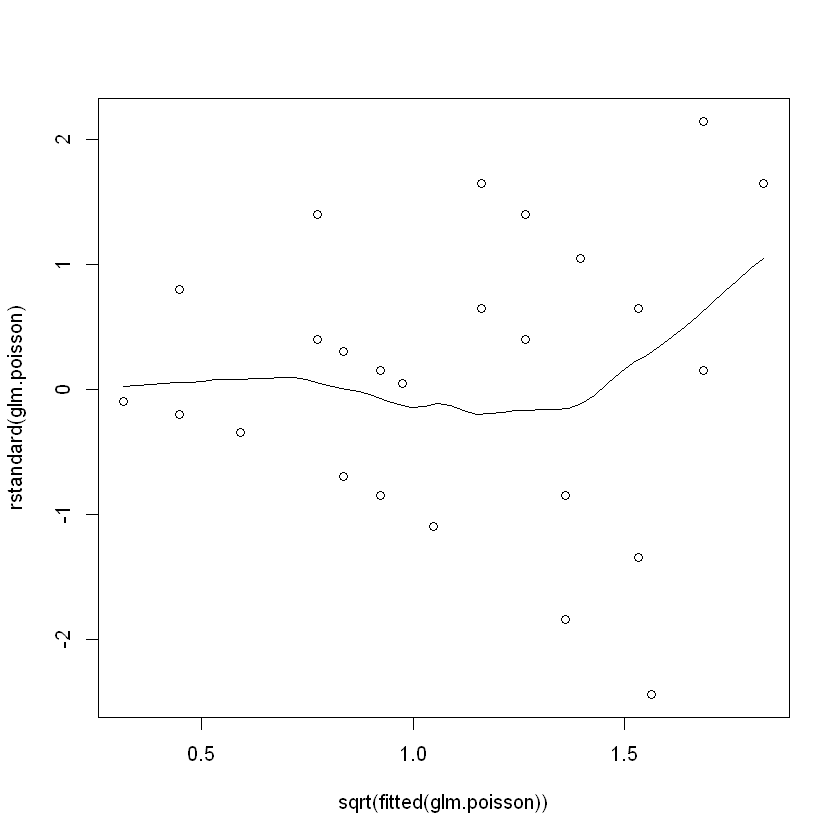

In [17]:
scatter.smooth(rstandard(glm.poisson) ~ sqrt(fitted(glm.poisson)))

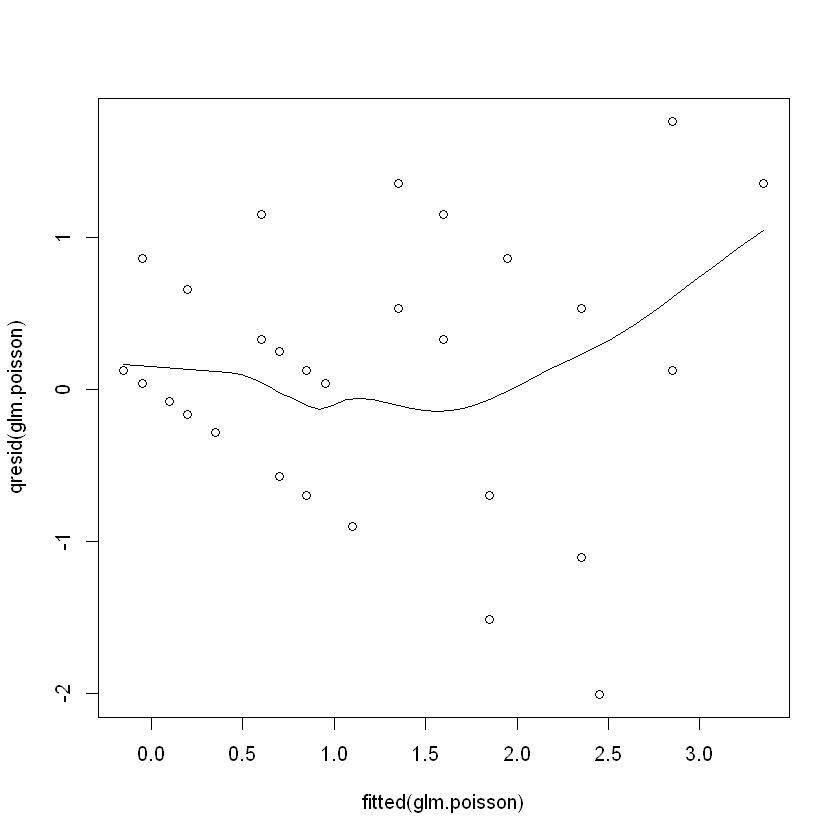

In [18]:
scatter.smooth(qresid(glm.poisson) ~ fitted(glm.poisson))

Warning message in sqrt(fitted(glm.poisson)):
"NaNs produced"

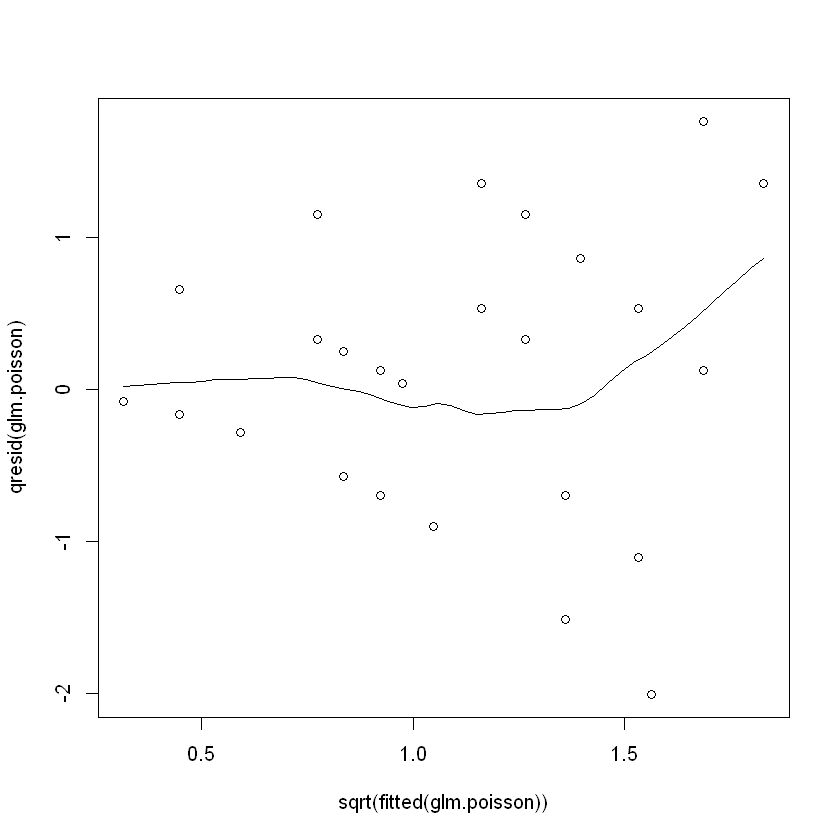

In [19]:
scatter.smooth(qresid(glm.poisson) ~ sqrt(fitted(glm.poisson)))